3 Data analysis and visualization
======
***

3.2 Wikipedia data analysis and visualization
------

### 3.2.1 Static visualization with matplotlib

**Import python library and set display number.**

In [3]:
# import pandas python library
import pandas as pd 
# set dataframe maximum display number
pd.set_option('display.max_rows', 100)

**Read data from explorer csv file from 1.2.1, check and inspect data frame. See 1.2.1, the csv file is the list of explorers from https://en.wikipedia.org/wiki/List_of_explorers which contain explorer names, nationalities, centuries and main areas explored.**

In [4]:
# Read data from file 
data = pd.read_csv("cleandata_explorers.csv") 
# Preview the first 5 lines of the loaded data 
print(data.head())
# show data frame dimension
print(data.shape)


                              name  \
0                 Antonio de Abreu   
1                    William Adams   
2                     Diogo Afonso   
3  Sir Crispin Agnew of Lochnaw Bt   
4                  Charles Albanel   

                                                area century nationality  
0                                          Indonesia    16th  Portuguese  
1                                              Japan    17th     English  
2                            Northwest African coast    15th  Portuguese  
3  Greenland, Elephant Island, Northern Patagonia...    20th    Scottish  
4                                             Canada    17th      French  
(787, 4)


In [5]:
data.drop_duplicates()
data.shape

(787, 4)

**Show explorer data sorted by century count.** 

In [14]:
# show explorer data sorted by century count
print(data['century'].value_counts(ascending=False))


19th       204
16th       135
20th       129
15th        81
18th        79
17th        66
21st        31
13th        10
14th         9
10th         7
9th          7
11th         6
4th BC       4
6th BC       4
8th          3
2nd BC       2
1st BC       2
12th         2
15th BC      1
6th          1
3rd BC       1
7th          1
5th BC       1
20th BC      1
Name: century, dtype: int64


**Plot bar chart for Number of explorer for each century.**

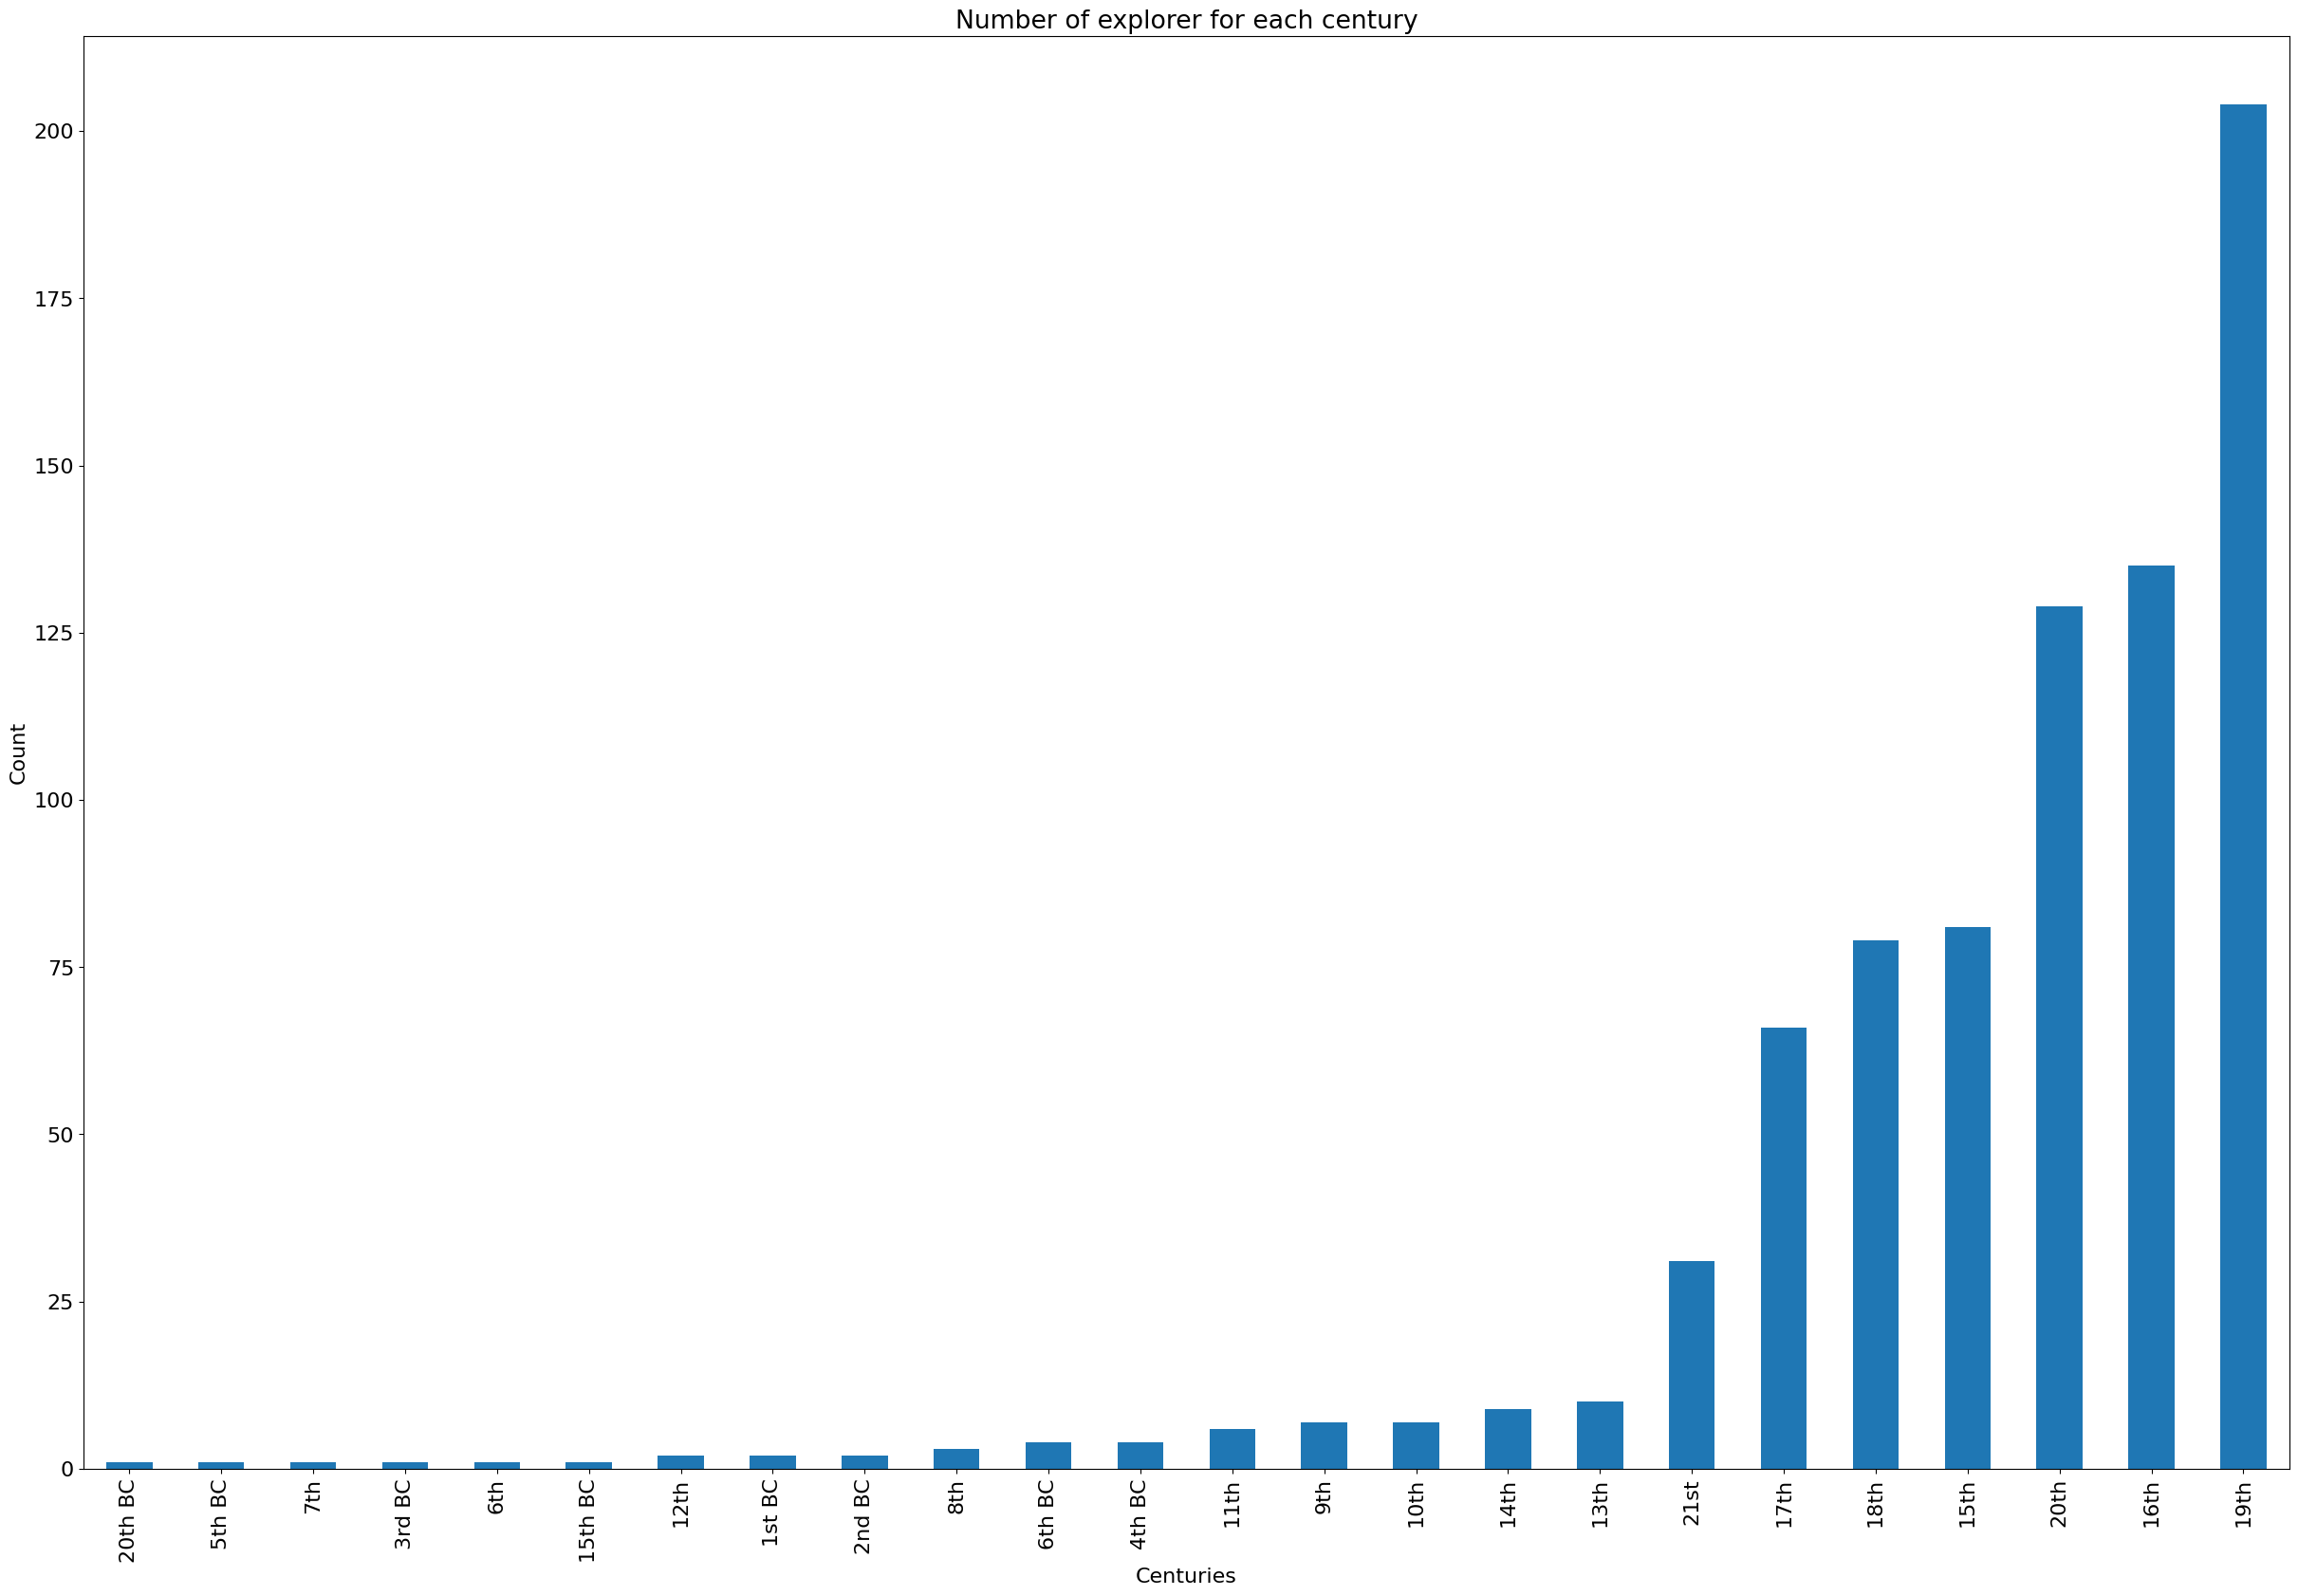

In [13]:
# import plot graph library
import matplotlib.pyplot as plt
# set graph figure size
plt.figure(figsize=(30,20), dpi=100)
# set plot graph data, label, fontsize
data['century'].value_counts(ascending=True).plot(kind='bar',title="Number of explorer for each century")
plt.xlabel("Centuries")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.rcParams.update({'font.size': 16})
plt.show()

**Create new data frame with explorer data grouped and sorted by nationality count. Check and inspect the new data frame**

In [7]:
# create new data frame - explorer data grouped and sorted by nationality count
natCountF = data['nationality'].value_counts(ascending=False).rename_axis('nationality').reset_index(name='counts')
print(natCountF.head())
print(natCountF.shape)
print(natCountF)

  nationality  counts
0  Portuguese     124
1     English      87
2     Spanish      68
3    American      68
4      French      54
(79, 2)
     nationality  counts
0     Portuguese     124
1        English      87
2        Spanish      68
3       American      68
4         French      54
5        Russian      43
6        Italian      33
7         German      31
8       Scottish      24
9          Irish      17
10         Dutch      16
11       British      13
12      Canadian      12
13         Greek      11
14    Australian       8
15        Baltic       8
16        Danish       8
17       Chinese       8
18     Norwegian       7
19     Hungarian       7
20         Welsh       7
21       Belgian       6
22       Swedish       6
23         Norse       6
24     Brazilian       5
25            ic       5
26        Viking       5
27       Genoese       5
28      Egyptian       4
29         Swiss       4
30          Icel       4
31      Siberian       4
32      Venetian       4
33       C


**Plot bar chart for Number of explorer for each nationality. Apart from showing the chart here we are saving it to a png file.**

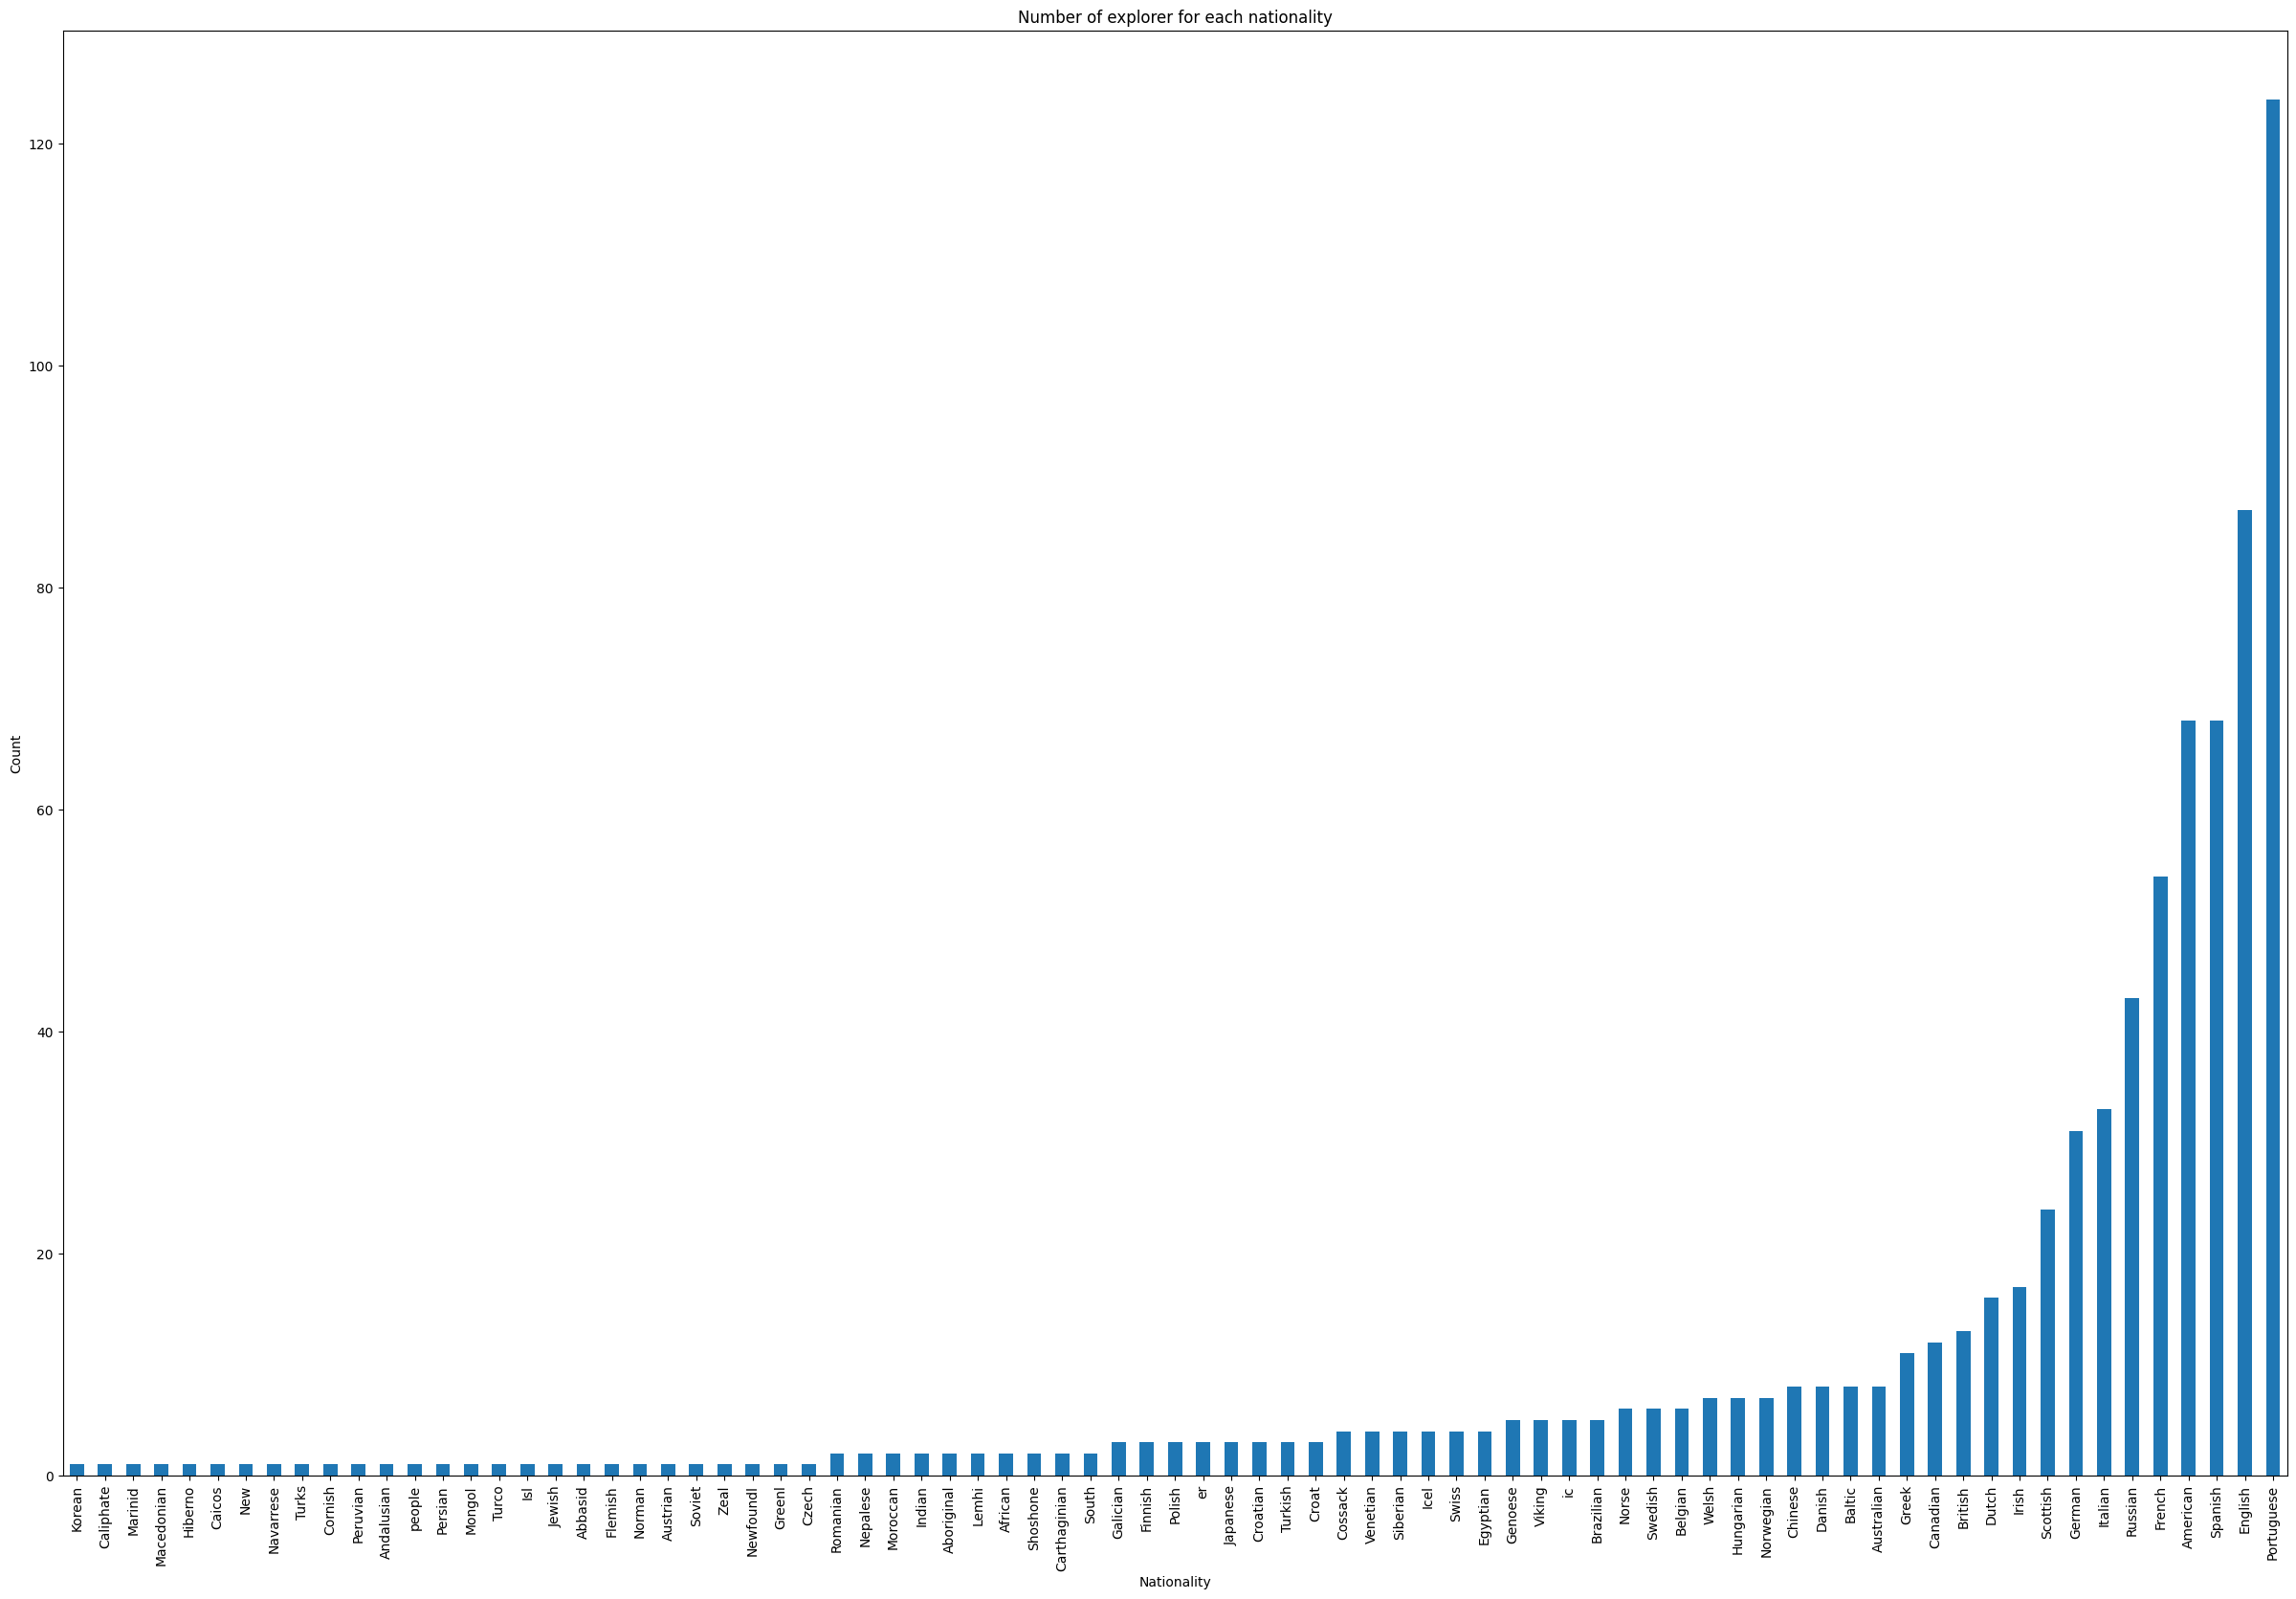

In [8]:
# set plot bar figure size
plt.figure(figsize=(30,20), dpi=100)
# show barchart by Number of explorer for each nationality
data['nationality'].value_counts(ascending=True).plot(kind='bar',title="Number of explorer for each nationality")
# set plot labels
plt.xlabel("Nationality")
plt.ylabel("Count")
# set plot fontsize
plt.rcParams.update({'font.size': 16})
# save barchart to image
plt.savefig('explorer-nationality.png', bbox_inches='tight')
#plt.show()


### 3.2.2 Interactive visualization with Plotly

**import plotly express package for interactive charts.**

In [9]:
# import plotly express package for interactive charts
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"

**Plot scatter chart for explorer nationality and century distributions.**

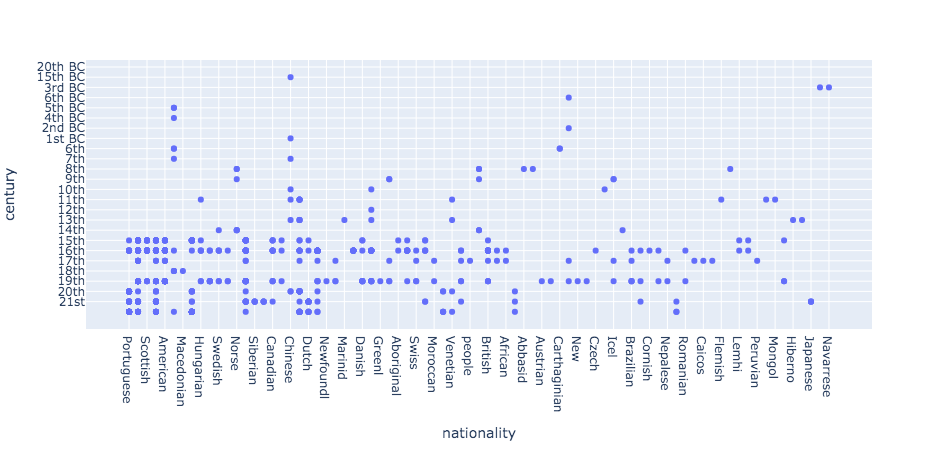

In [10]:
# Scatter chart for nationality, century explorer data distributions
fig = px.scatter(data, x='nationality', y='century')
fig.update_yaxes(tickmode = 'array',ticktext=["21st","20th","19th","18th","17th","16th","15th","14th","13th","12th","11th","10th","9th","8th","7th","6th", "1st BC","2nd BC","4th BC", "5th BC", "6th BC","3rd BC","15th BC","20th BC"],
                tickvals=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16", "17","18","19", "20", "21","22","23","24"])
fig.update_xaxes(type='-',nticks=50)

fig.show()

**Plot interative barchart by Number of explorer for each nationality.**

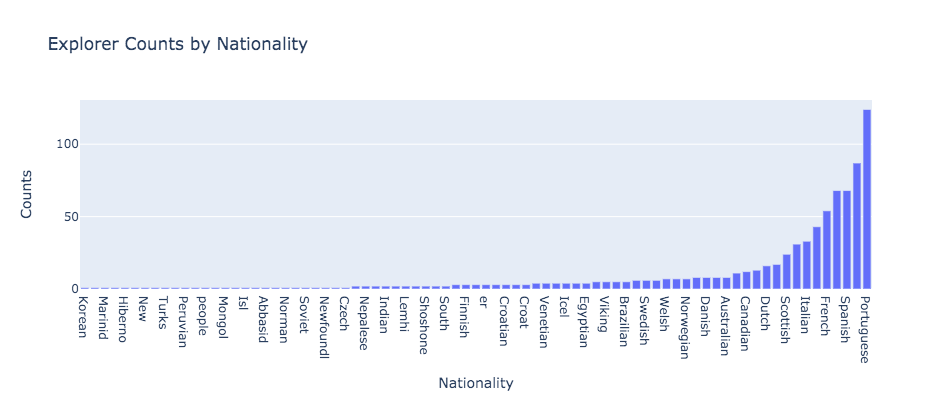

In [11]:
# create dataframe for nationality counts
nationality_counts = data['nationality'].value_counts(ascending=True).to_frame("Count").reset_index()
# show interative barchart by Number of explorer for each nationality
px.bar(
    nationality_counts, x="index", y="Count", 
    labels=dict(Count="Counts", index="Nationality"), 
    width=800, height=400, title="Explorer Counts by Nationality"
)

**Plot interative barchart by Number of explorer for each century.**

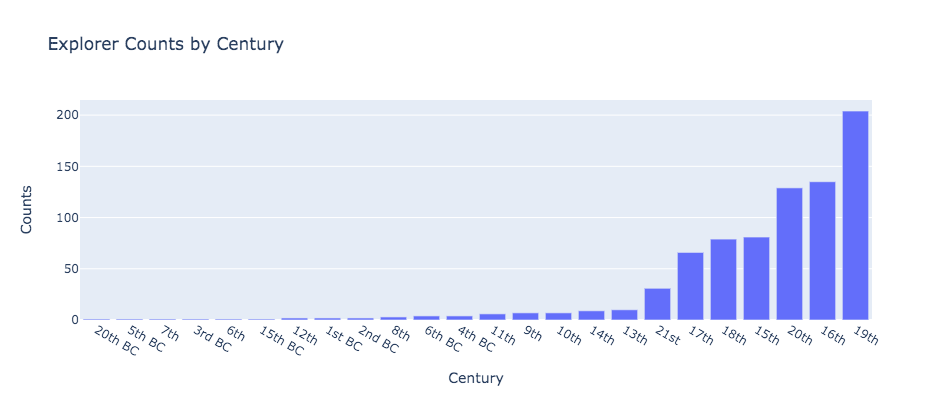

In [12]:
# create dataframe for century counts
century_counts = data['century'].value_counts(ascending=True).to_frame("Count").reset_index()
# show interative barchart by Number of explorer for each century
px.bar(
    century_counts, x="index", y="Count", 
    labels=dict(Count="Counts", index="Century"), 
    width=800, height=400, title="Explorer Counts by Century"
)